In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
##Dist plot --> Distribution of univariate set of obs... one variable

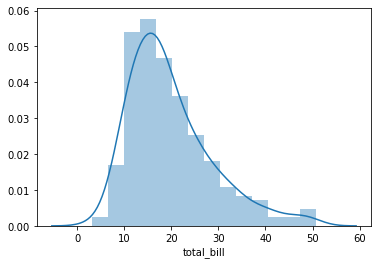

In [6]:
sns.distplot(tips['total_bill'])

In [7]:
#KDE -- > Kernel Density Estimation

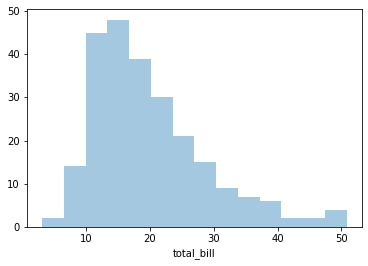

In [8]:
sns.distplot(tips['total_bill'],kde = False)

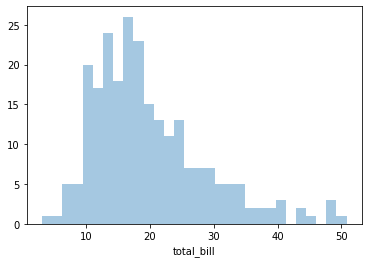

In [9]:
sns.distplot(tips['total_bill'],kde=False,bins =30)

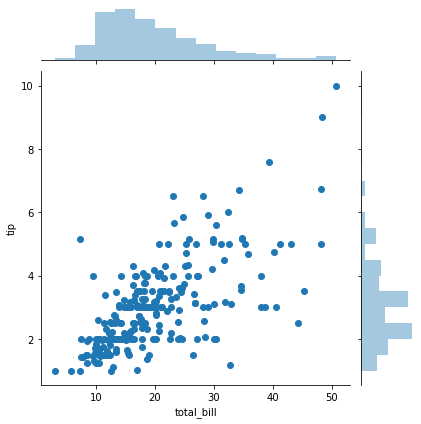

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips)

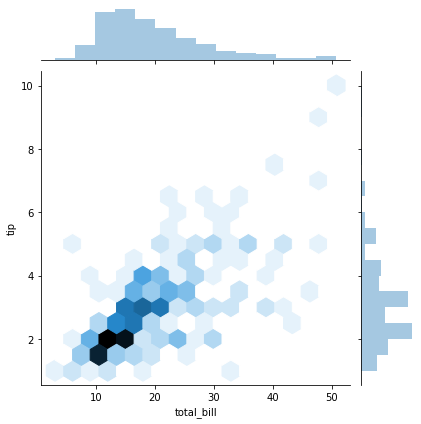

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex') #kind affects inside joint plot... default scatter... hex = hexagon

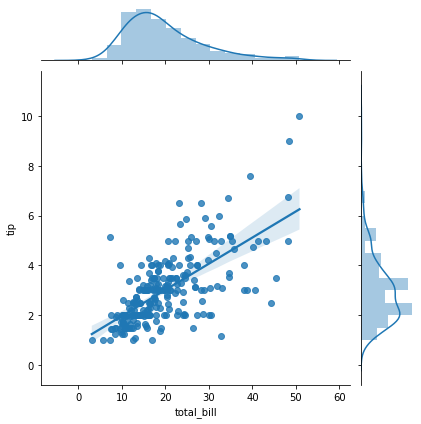

In [12]:
sns.jointplot(x='total_bill',y='tip',data = tips,kind='reg')   #reg = regression

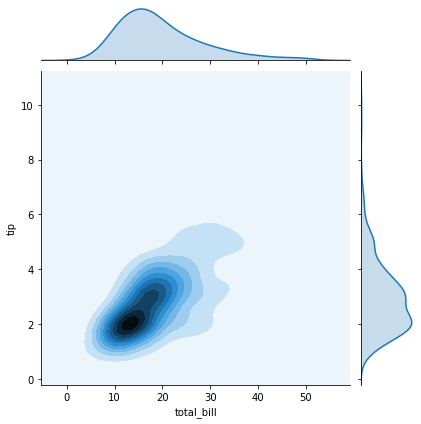

In [13]:
sns.jointplot(x='total_bill',y='tip',data = tips,kind='kde')   #kde gives a 2d kde

In [14]:
#Pair plot  --> plot pairwise relationship, colourhue for categorical columns

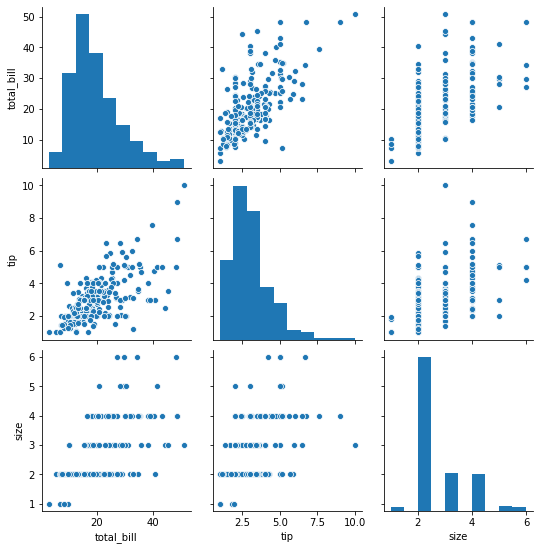

In [15]:
sns.pairplot(tips)  #Takes just the data

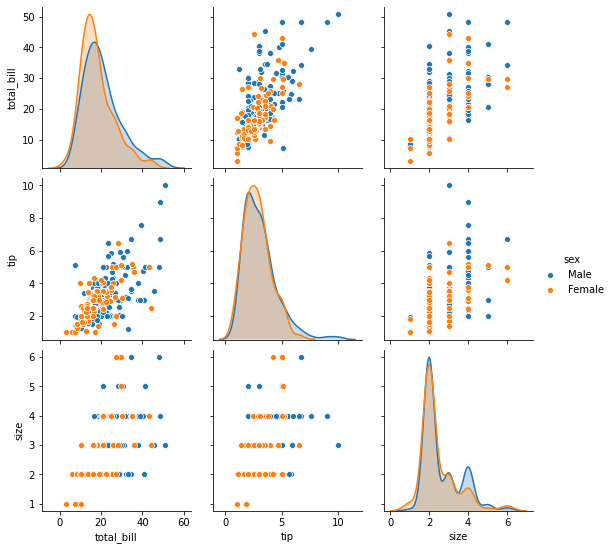

In [16]:
sns.pairplot(tips,hue='sex')

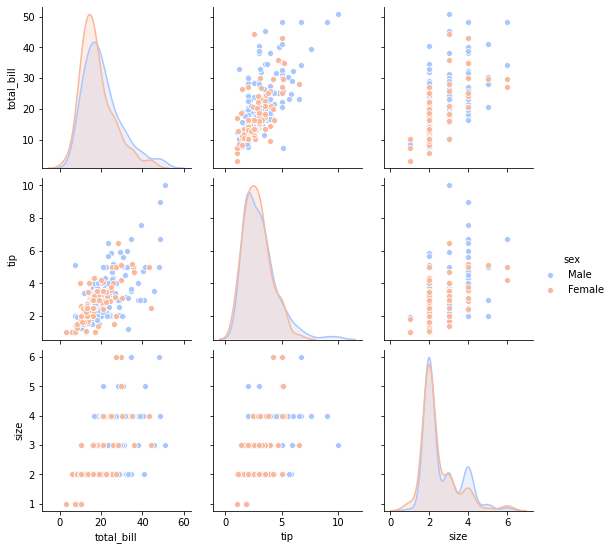

In [17]:
sns.pairplot(tips,hue='sex',palette='coolwarm') ##Palette specifies color

In [18]:
#Built and explain kde plots

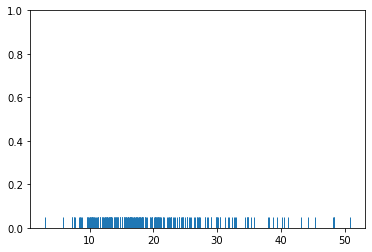

In [19]:
sns.rugplot(tips['total_bill'])

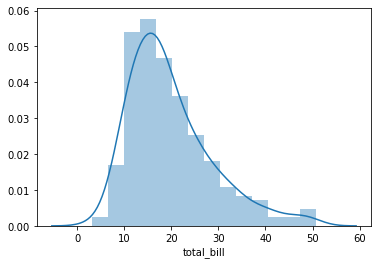

In [20]:
sns.distplot(tips['total_bill'])

(0.0, 1.0)

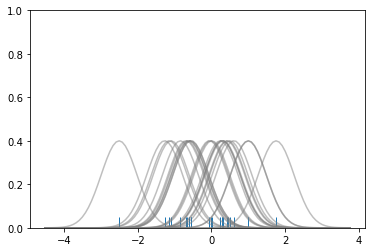

In [21]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

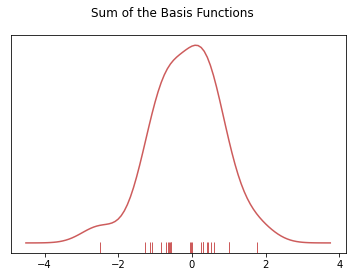

In [28]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

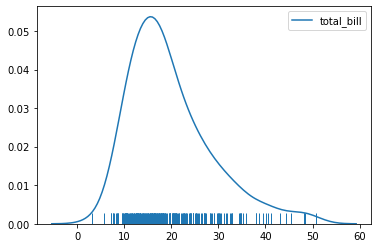

In [29]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

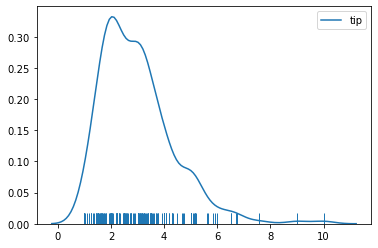

In [30]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

In [ ]:
#Categorical Plots

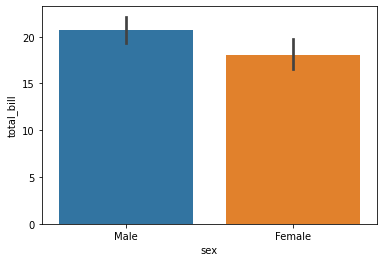

In [31]:
sns.barplot(x='sex',y='total_bill',data = tips)  #Avg 

In [32]:
import numpy as np

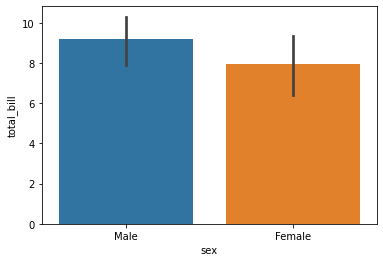

In [33]:
sns.barplot(x='sex',y='total_bill',data = tips,estimator=np.std)  

In [34]:
#countplot is samne as barplot, except the estimator is explicitly counting the no of occureneces

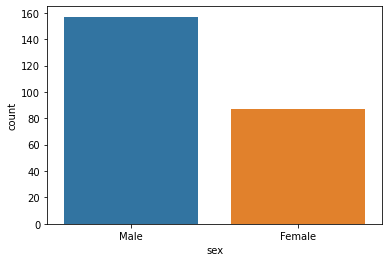

In [35]:
sns.countplot(x='sex',data=tips)

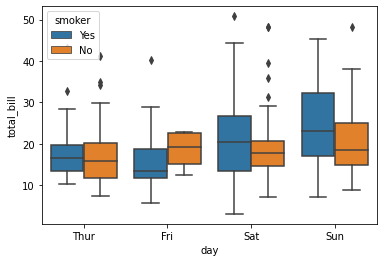

In [36]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')  #Shows quartiles,dots are outliers

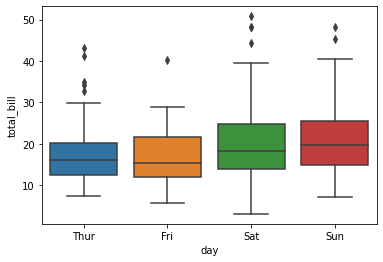

In [37]:
sns.boxplot(x='day',y='total_bill',data=tips)

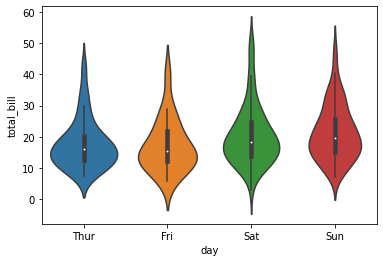

In [38]:
sns.violinplot(x='day',y='total_bill',data=tips) #Aloow us to plot all the components pertainiong to the actual dataset 

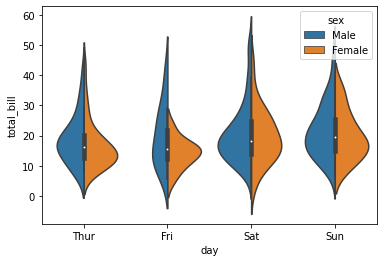

In [39]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True) #Aloow us to plot all the components pertainiong to the actual dataset 

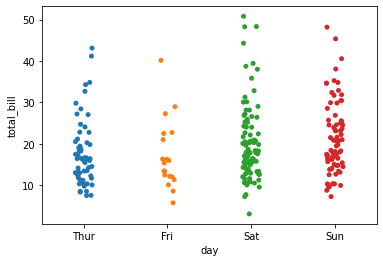

In [40]:
sns.stripplot(x='day',y='total_bill',data=tips)

/home/abhrajyoti/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


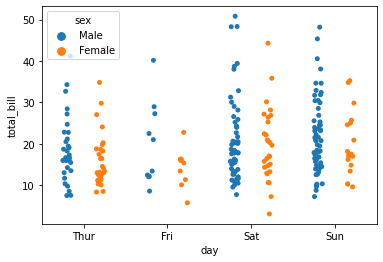

In [41]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',split=True)

In [42]:
#Jitter adds little random noise, more clear tha normal plot

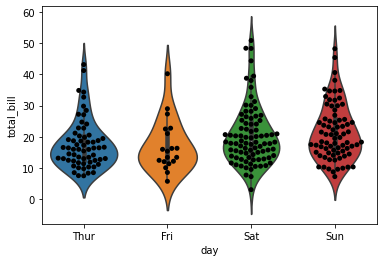

In [43]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

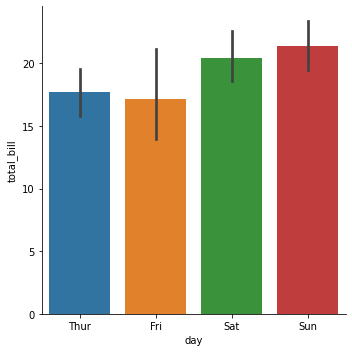

In [44]:
sns.catplot(x='day',y='total_bill',data=tips,kind='bar')

In [ ]:
#Matrix Plots


In [45]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [48]:
len(flights)

144

In [50]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [53]:
tc=tips.corr()

In [55]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


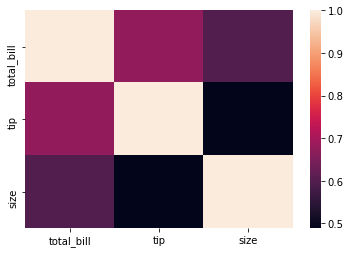

In [54]:
sns.heatmap(tc)

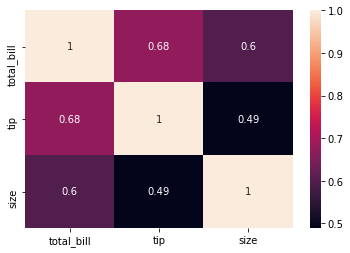

In [56]:
sns.heatmap(tc,annot=True)

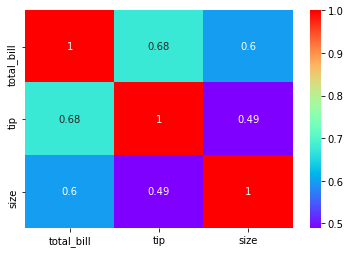

In [57]:
sns.heatmap(tc,annot=True,cmap='rainbow')

In [58]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [59]:
flights.pivot_table(index='month',columns='year',values='passengers' )

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [60]:
fp=flights.pivot_table(index='month',columns='year',values='passengers' )

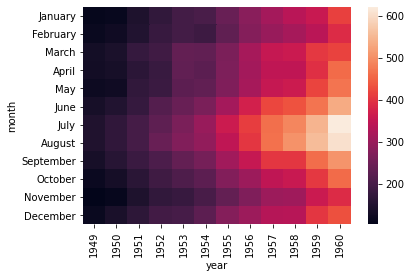

In [63]:
sns.heatmap(fp)

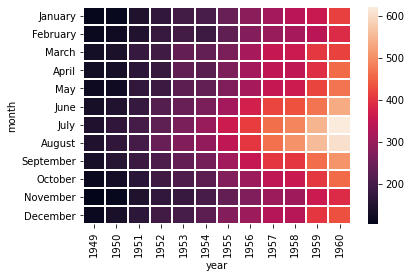

In [72]:
sns.heatmap(fp,linecolor='white',linewidths=1)

In [67]:
#Cluster Map --->clusters similar daata togethwer

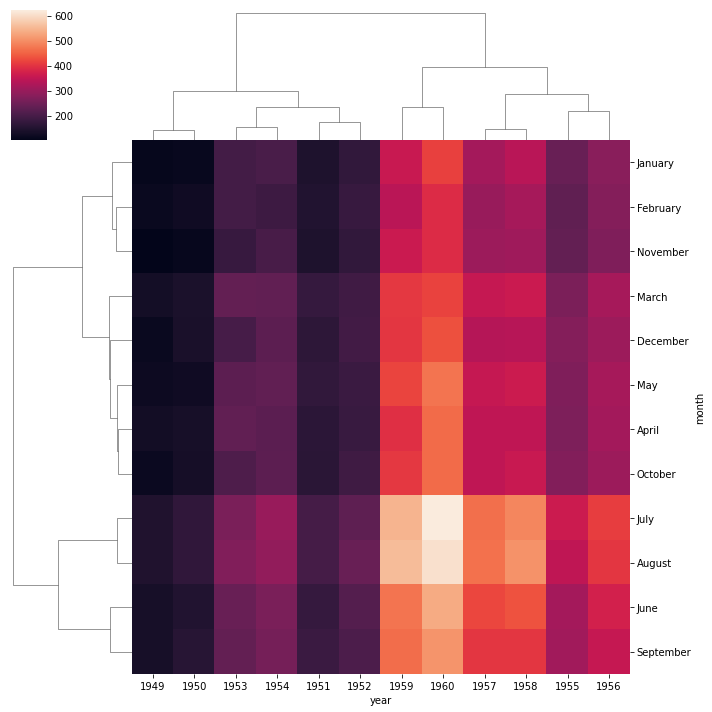

In [68]:
sns.clustermap(fp)

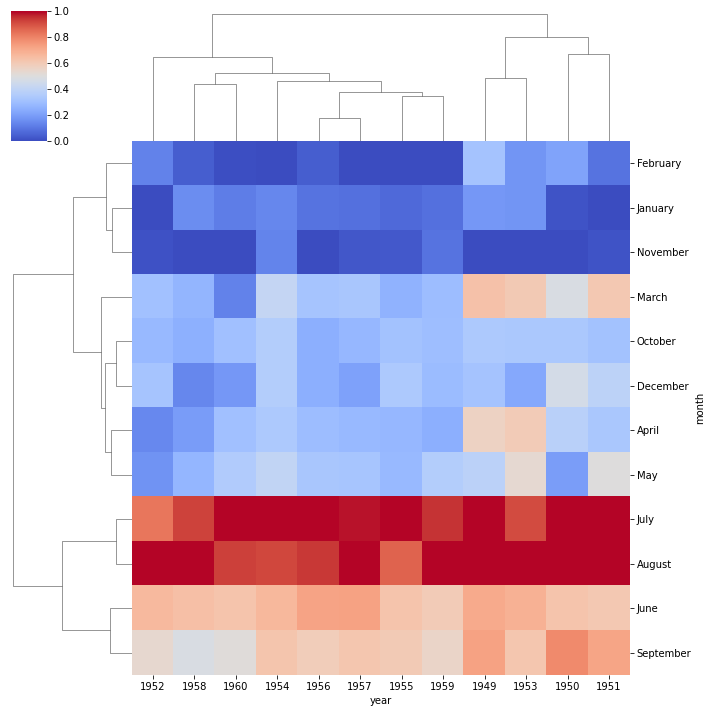

In [71]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [73]:
#GRIDS



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


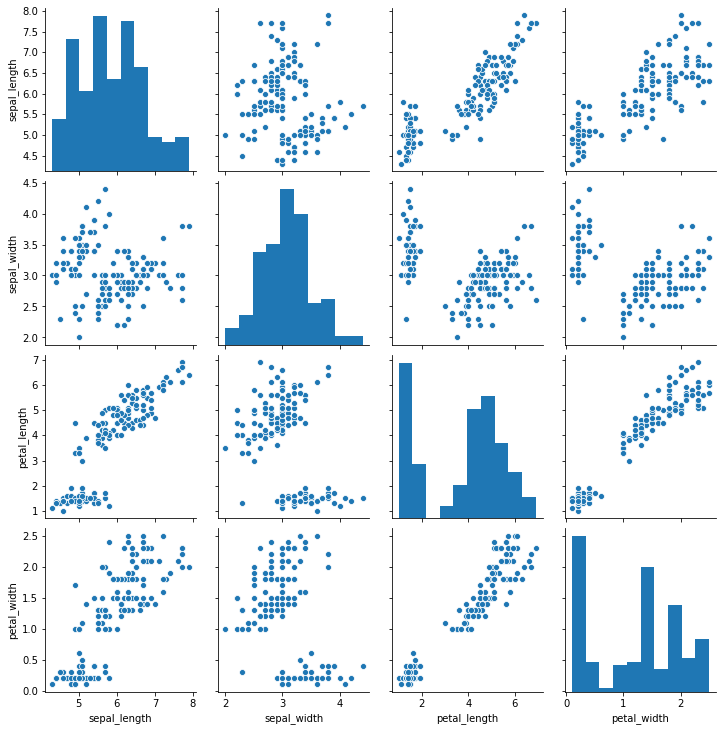

In [5]:
sns.pairplot(iris)

In [7]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


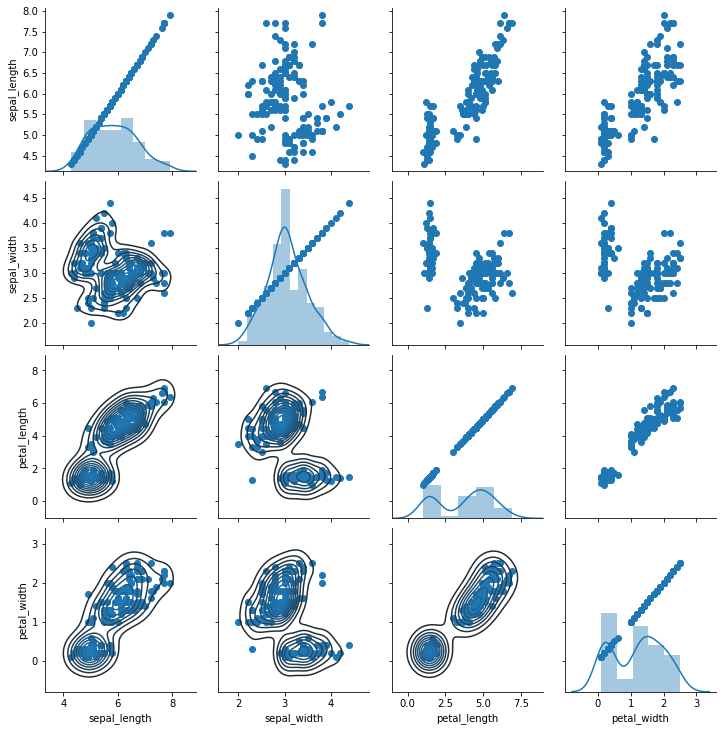

In [13]:
g = sns.PairGrid(iris)
g.map(plt.scatter)
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot)

In [14]:
tips = sns.load_dataset('tips')

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


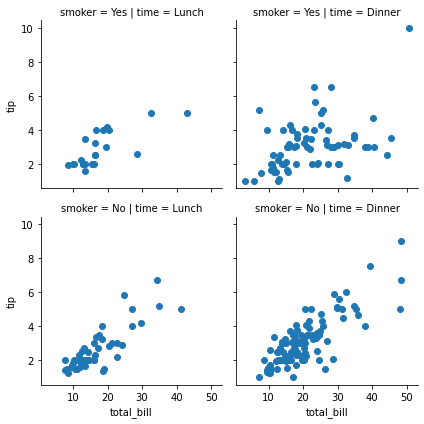

In [21]:
g = sns.FacetGrid(data = tips,row = 'smoker', col='time')
g.map(plt.scatter,'total_bill','tip')

In [22]:
#REgression plots


In [23]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


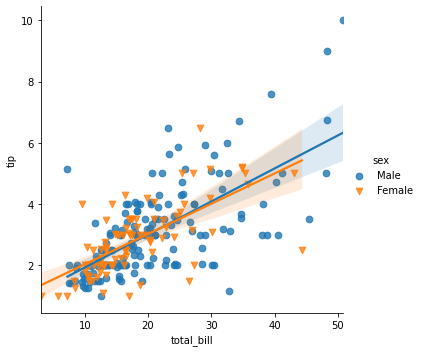

In [26]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':45}) #s = size

/home/abhrajyoti/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


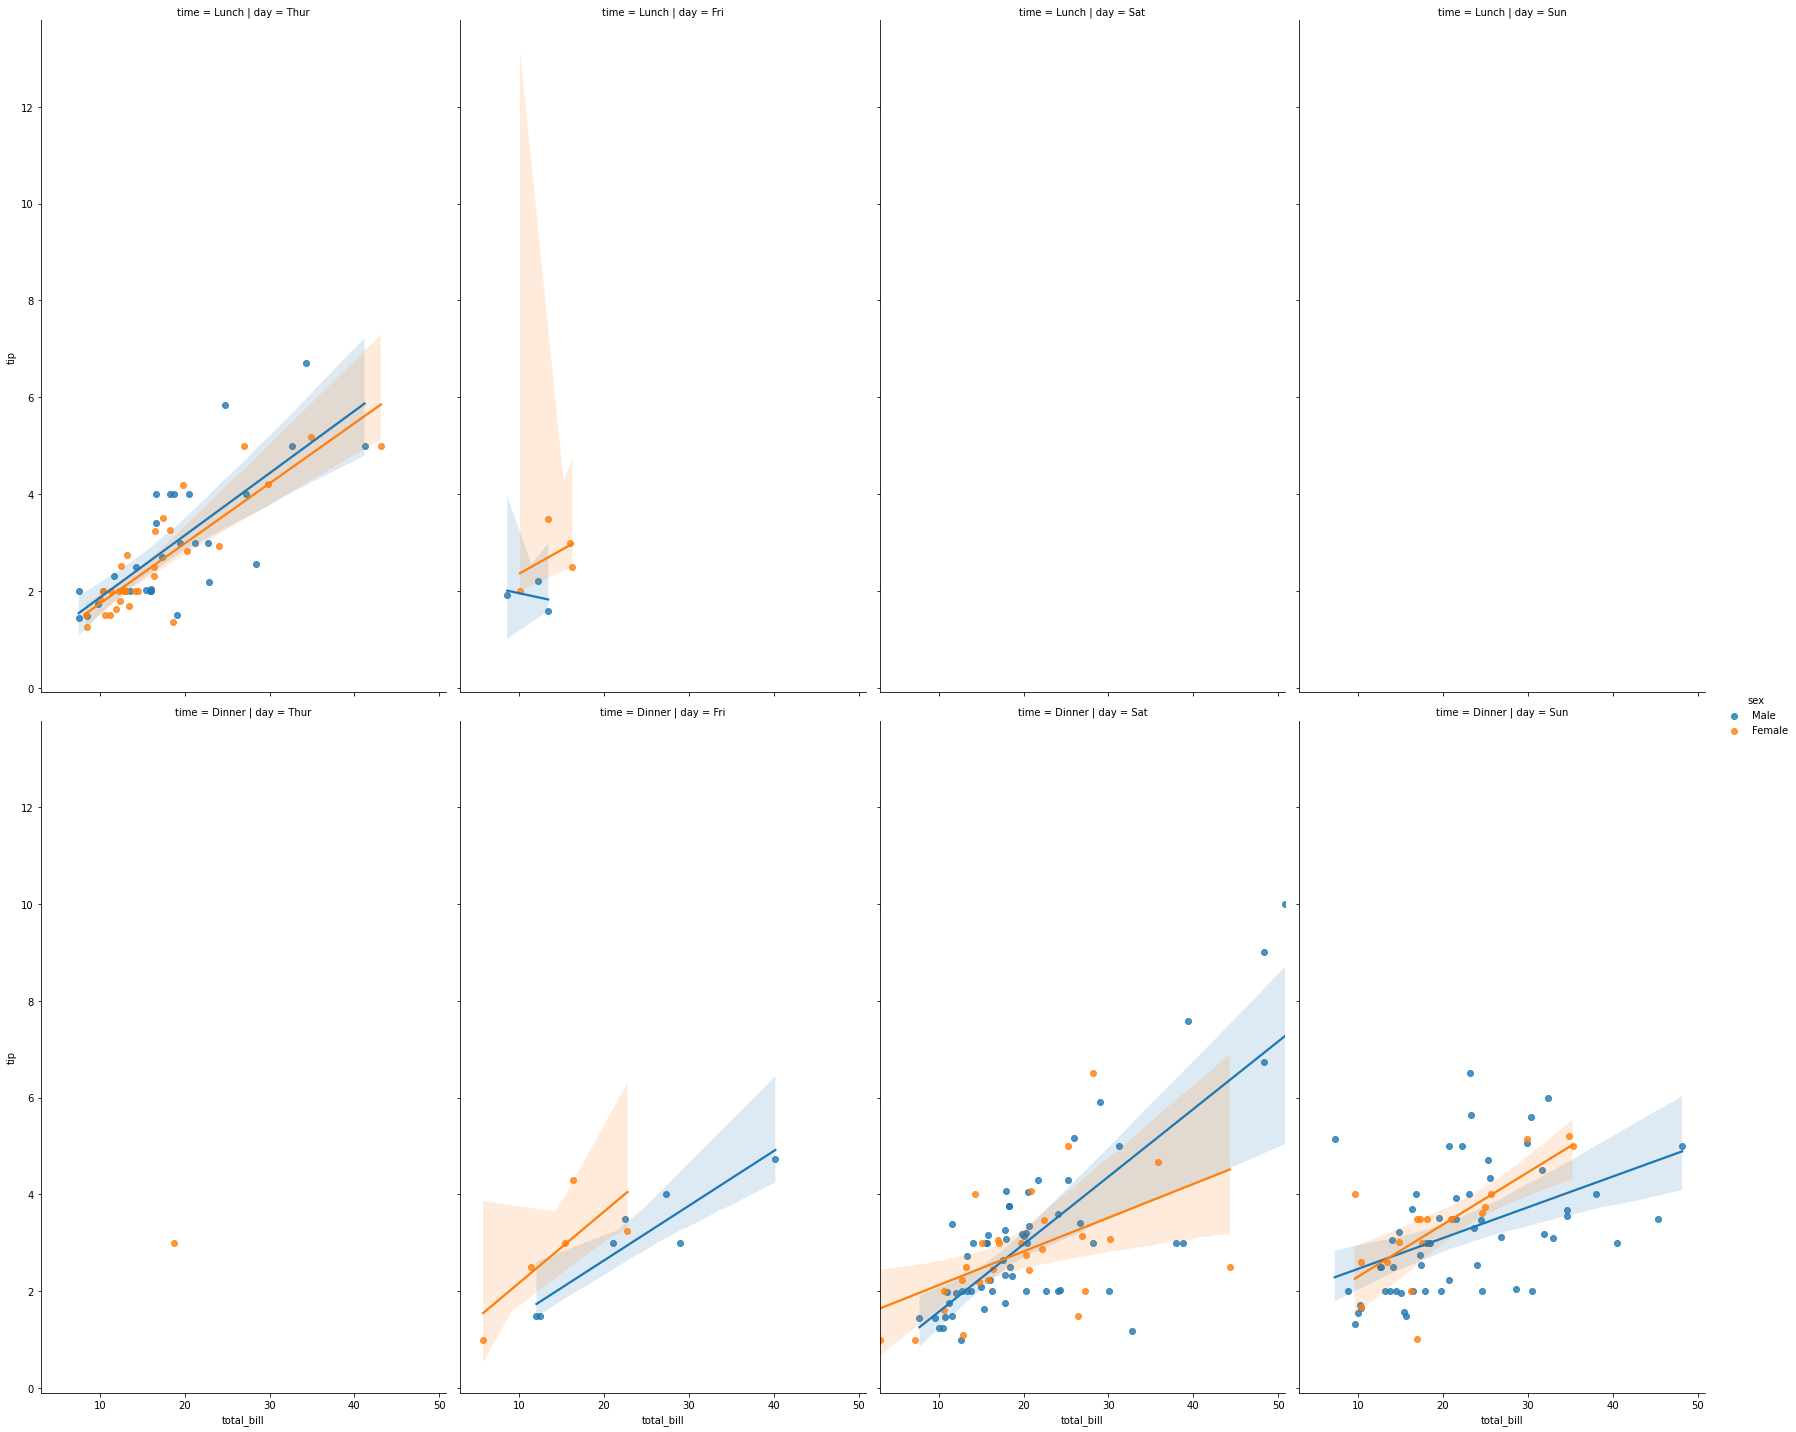

In [31]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',col='day',row = 'time',
          aspect=0.6,size=10)

In [32]:
###Stye color

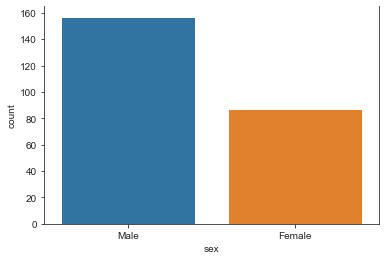

In [40]:

sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine(right=False)

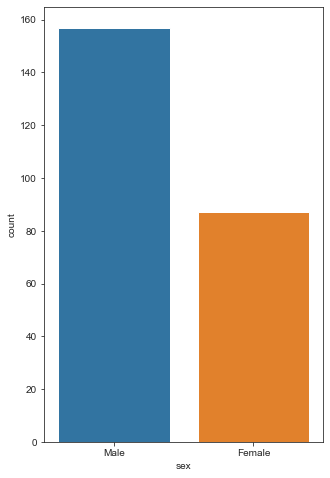

In [41]:
plt.figure(figsize=(5,8))
sns.countplot(x='sex',data=tips)

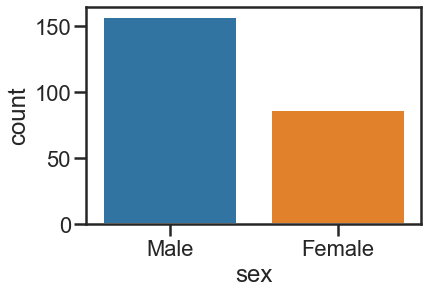

In [42]:
sns.set_context('poster')
sns.countplot(x='sex',data=tips)

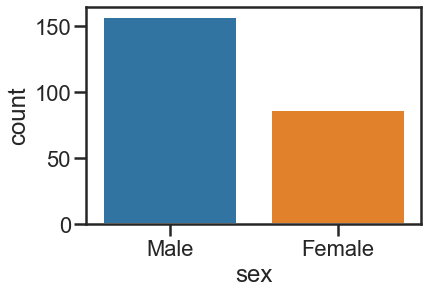

In [47]:
sns.set_context('poster',font_scale=1)
sns.countplot(x='sex',data=tips)

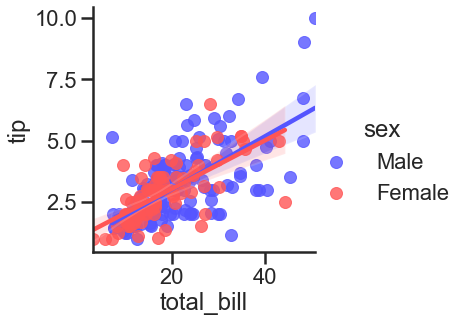

In [52]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')